### Classification Problem
#### Extrovert vs. Introvert Personality Prediction using Logistic Regression

In [126]:
!pip install statsmodels

#### 1. Data Loading & Basic Exploration

In [128]:
# Importing Libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score

In [130]:
# Load the dataset using pandas.
data=pd.read_csv(r"C:\Users\HP\Documents\AI_projects\Test 8.0\Test 8.0\Classification Problem\Personality_Dataset.csv")
data.head()

,Unnamed: 0,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,4.0,No,4.0,6.0,No,13.0,5.0,1
1,1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,0
2,2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,0
3,3,0.0,No,6.0,7.0,No,14.0,8.0,1
4,4,3.0,No,9.0,4.0,No,8.0,5.0,1


In [132]:
# Check the shape of the dataset (rows × columns).
data.shape

(2900, 9)

#### 2. Data Cleaning

In [136]:
# Check and handle missing values (nulls).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2900 non-null   int64  
 1   Time_spent_Alone           2837 non-null   float64
 2   Stage_fear                 2827 non-null   object 
 3   Social_event_attendance    2838 non-null   float64
 4   Going_outside              2834 non-null   float64
 5   Drained_after_socializing  2848 non-null   object 
 6   Friends_circle_size        2823 non-null   float64
 7   Post_frequency             2835 non-null   float64
 8   Personality                2900 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 204.0+ KB


In [138]:
data.isna().sum()

Unnamed: 0                    0
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [140]:
data.describe()

,Unnamed: 0,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000,2900.000000
mean,1449.500000,4.505816,3.963354,3.000000,6.268863,3.564727,0.514138
std,837.302215,3.479192,2.903827,2.247327,4.289693,2.926582,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,724.750000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000
50%,1449.500000,4.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,2174.250000,8.000000,6.000000,5.000000,10.000000,6.000000,1.000000
max,2899.000000,11.000000,10.000000,7.000000,15.000000,10.000000,1.000000


In [142]:
del data['Unnamed: 0']
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,1
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,0
3,0.0,No,6.0,7.0,No,14.0,8.0,1
4,3.0,No,9.0,4.0,No,8.0,5.0,1


In [144]:
data['Stage_fear'] = data['Stage_fear'].replace('No', 0)
data['Stage_fear'] = data['Stage_fear'].replace('Yes', 1)
data['Drained_after_socializing'] = data['Drained_after_socializing'].replace('No', 0)
data['Drained_after_socializing'] = data['Drained_after_socializing'].replace('Yes', 1)
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,1
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,1
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,1


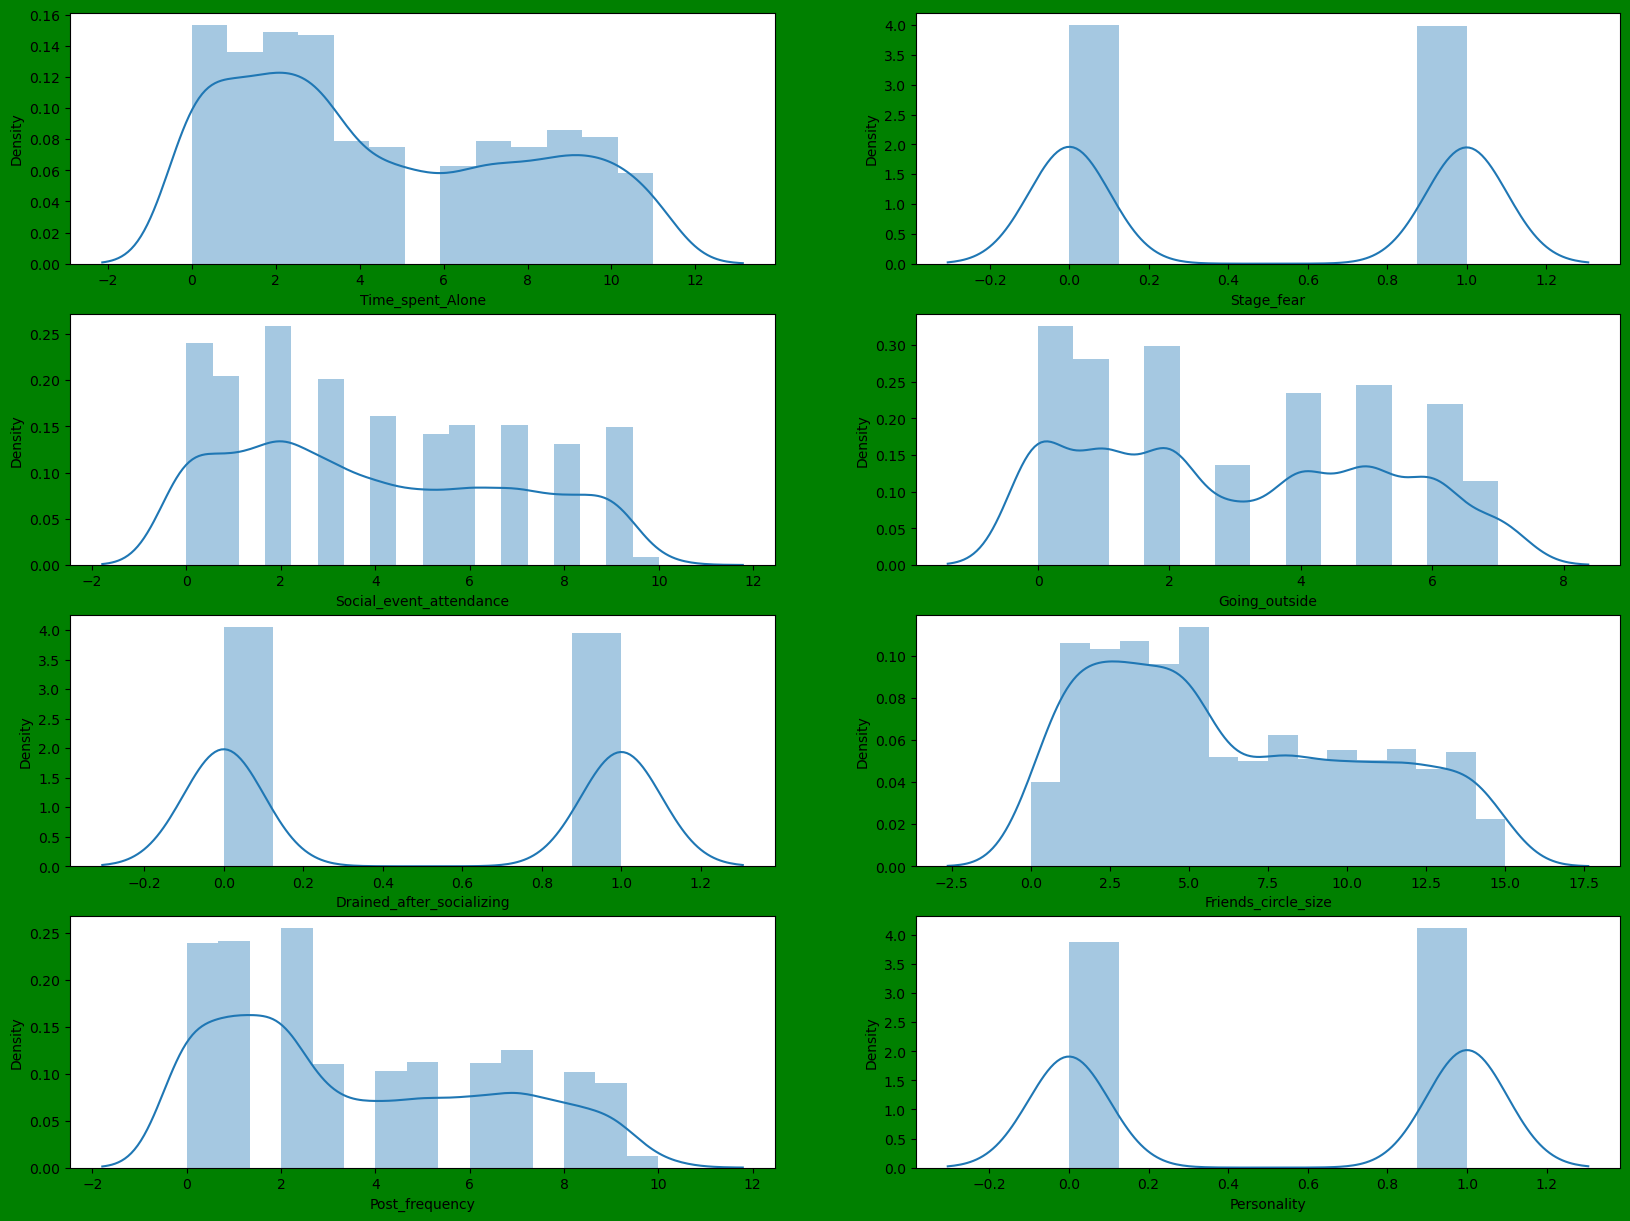

In [146]:
plt.figure(figsize=(20,15),facecolor='g')
graph=1
for column in data:
    if graph <=8:
        ax=plt.subplot(4,2,graph)
        sns.distplot(data[column])
        plt.xlabel(column)
    graph +=1
plt.show()

In [148]:
data=data.fillna(0)
data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,1
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,1
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,1
...,...,...,...,...,...,...,...,...
2895,3.0,0.0,7.0,6.0,0.0,6.0,6.0,1
2896,3.0,0.0,8.0,3.0,0.0,14.0,9.0,1
2897,4.0,1.0,1.0,1.0,1.0,4.0,0.0,0
2898,11.0,1.0,1.0,0.0,1.0,2.0,0.0,0


In [150]:
data.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [152]:
data['Time_spent_Alone']=data['Time_spent_Alone'].replace(0,data['Time_spent_Alone'].mean())
data['Social_event_attendance']=data['Social_event_attendance'].replace(0,data['Social_event_attendance'].mean())
data['Going_outside']=data['Going_outside'].replace(0,data['Going_outside'].mean())
data['Friends_circle_size']=data['Friends_circle_size'].replace(0,data['Friends_circle_size'].mean())
data['Post_frequency']=data['Post_frequency'].replace(0,data['Post_frequency'].mean())

In [154]:
#Remove any duplicate rows.
data = data.drop_duplicates()

In [156]:
data.shape

(2452, 8)

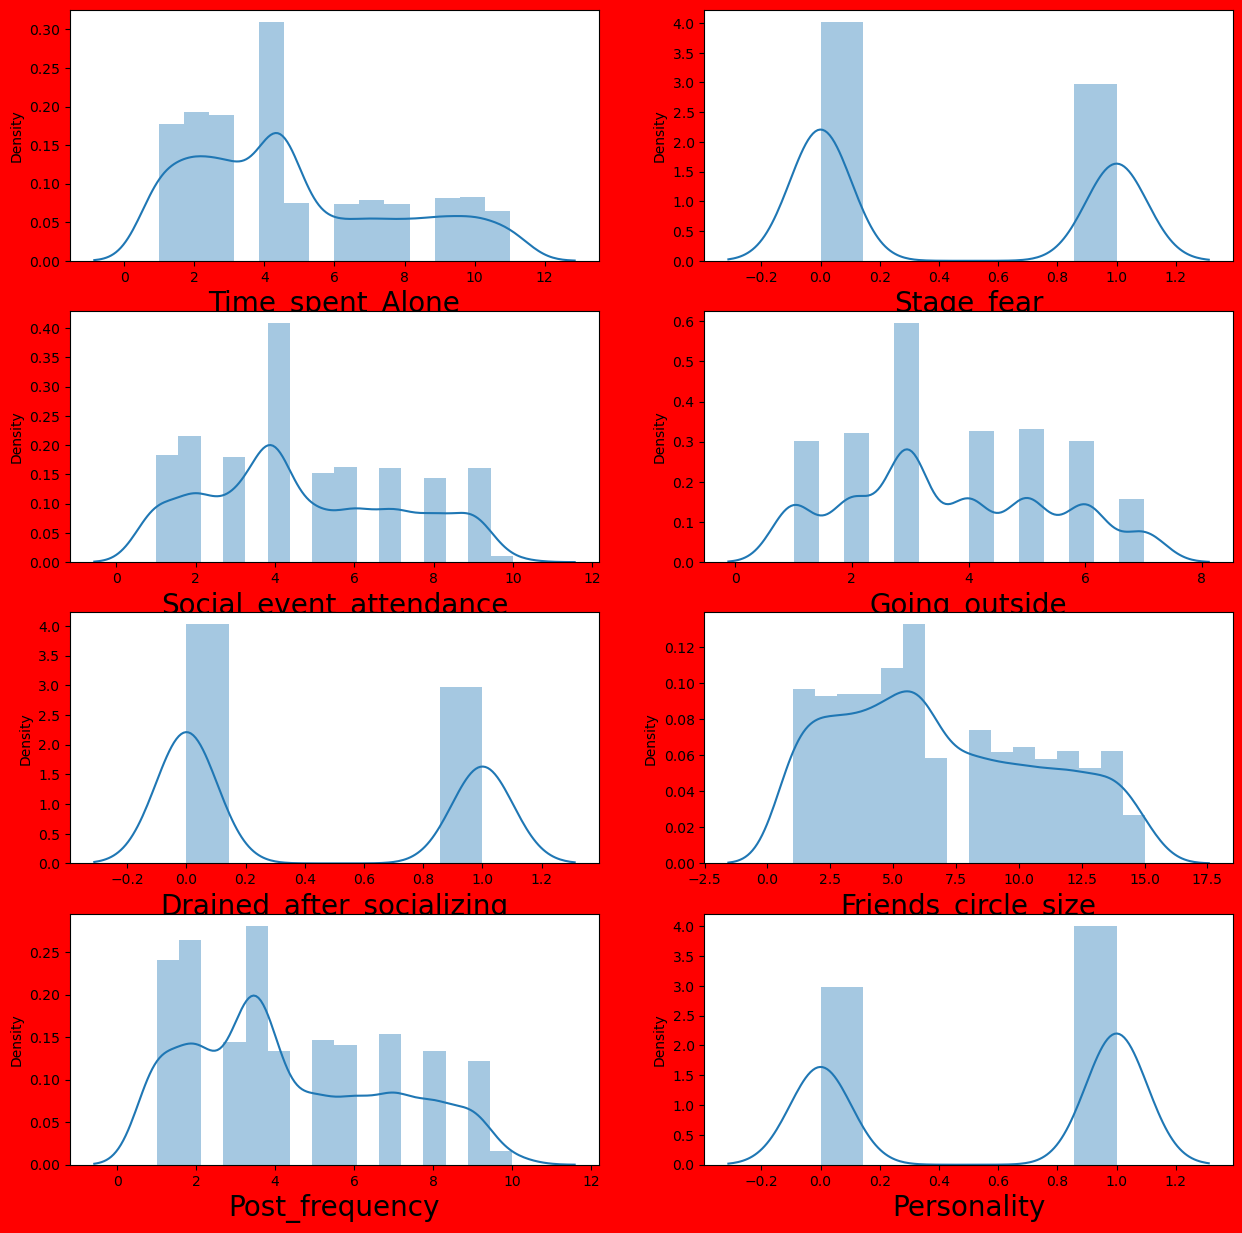

In [158]:
plt.figure(figsize=(15,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber <=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [160]:
#Detect and treat outliers
df_feature=data.drop(['Stage_fear', 'Drained_after_socializing', 'Personality'], axis=1)
df_feature.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,4.000000,4.000000,6.000000,13.000000,5.0
1,9.000000,3.878621,2.931724,6.102414,3.0
2,9.000000,1.000000,2.000000,5.000000,2.0
3,4.407931,6.000000,7.000000,14.000000,8.0
4,3.000000,9.000000,4.000000,8.000000,5.0


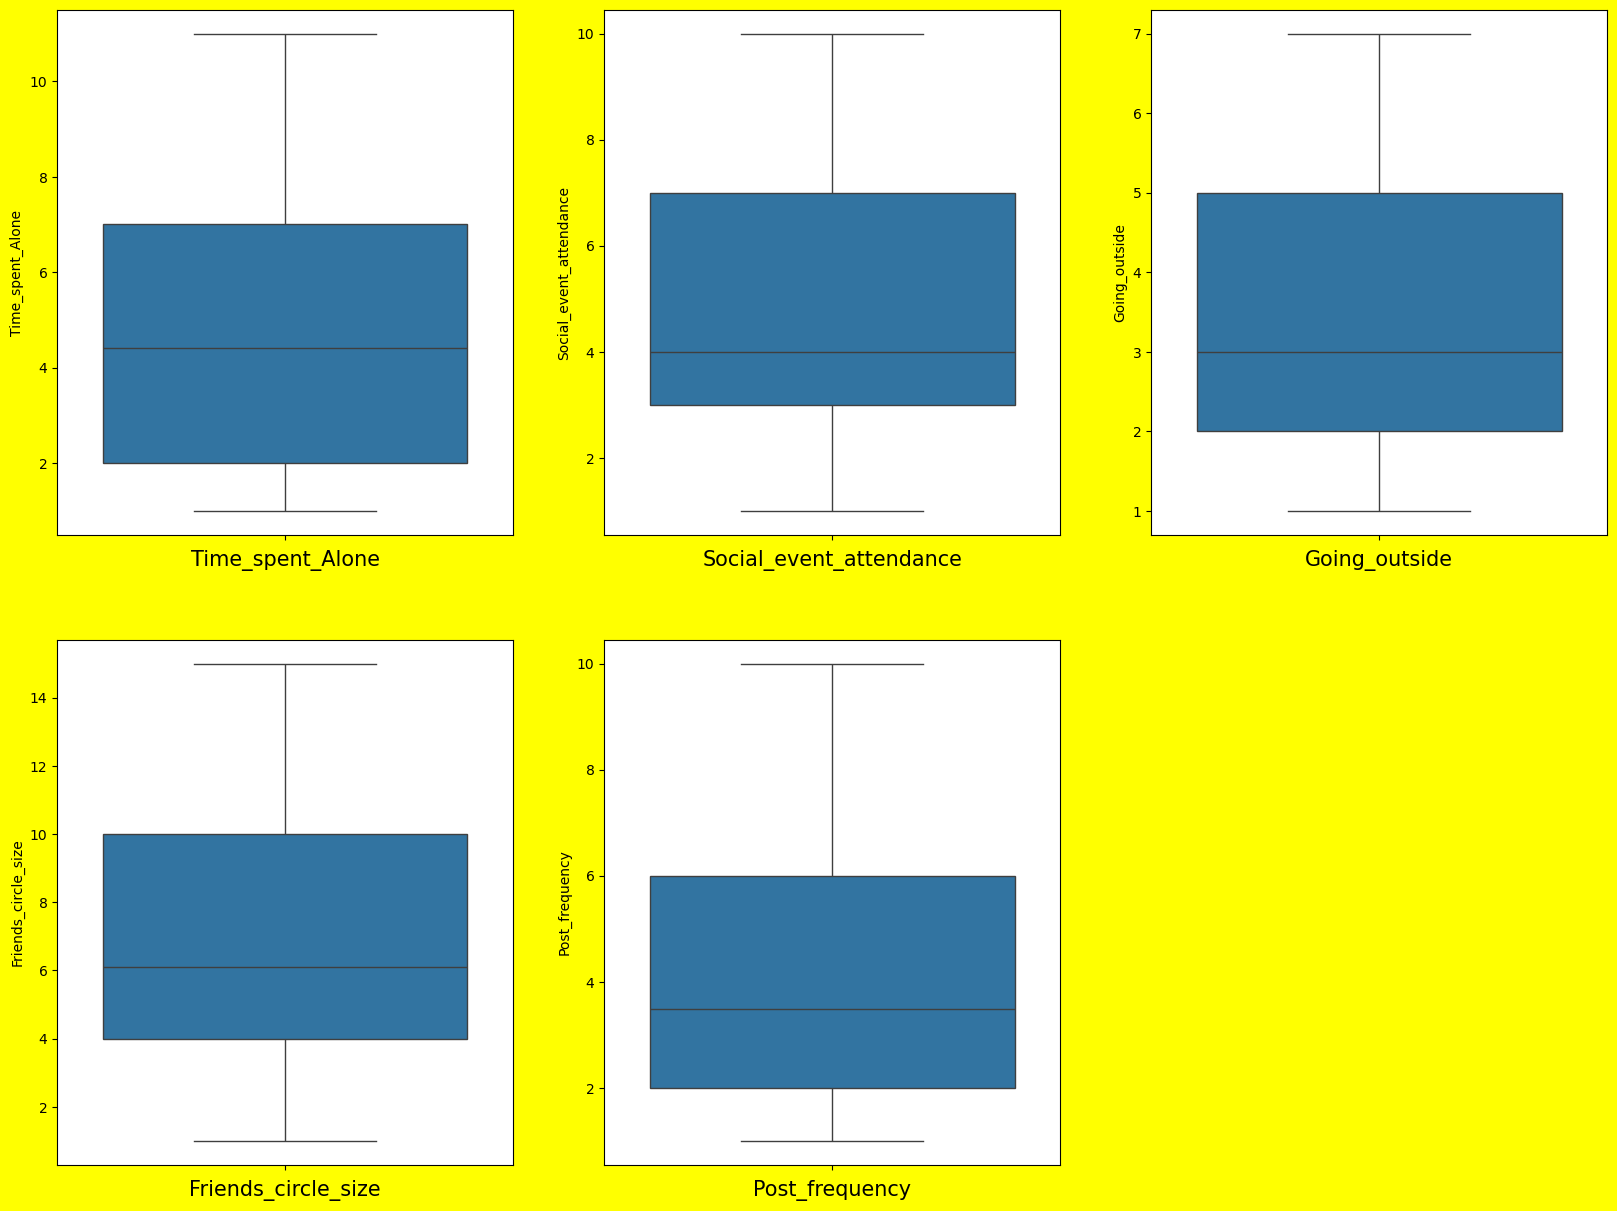

In [162]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in df_feature:
    if plotnumber <=9:
        plt.subplot(2,3,plotnumber)
        ax=sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

#### No outliers in our data, so we dont want to detect outliers and calculate IQR method

In [165]:
# Analyze the distribution of each numerical feature using:
# sns.histplot() or sns.kdeplot() (previously distplot)

In [167]:
x=data.drop(columns=['Personality'])
y=data.Personality

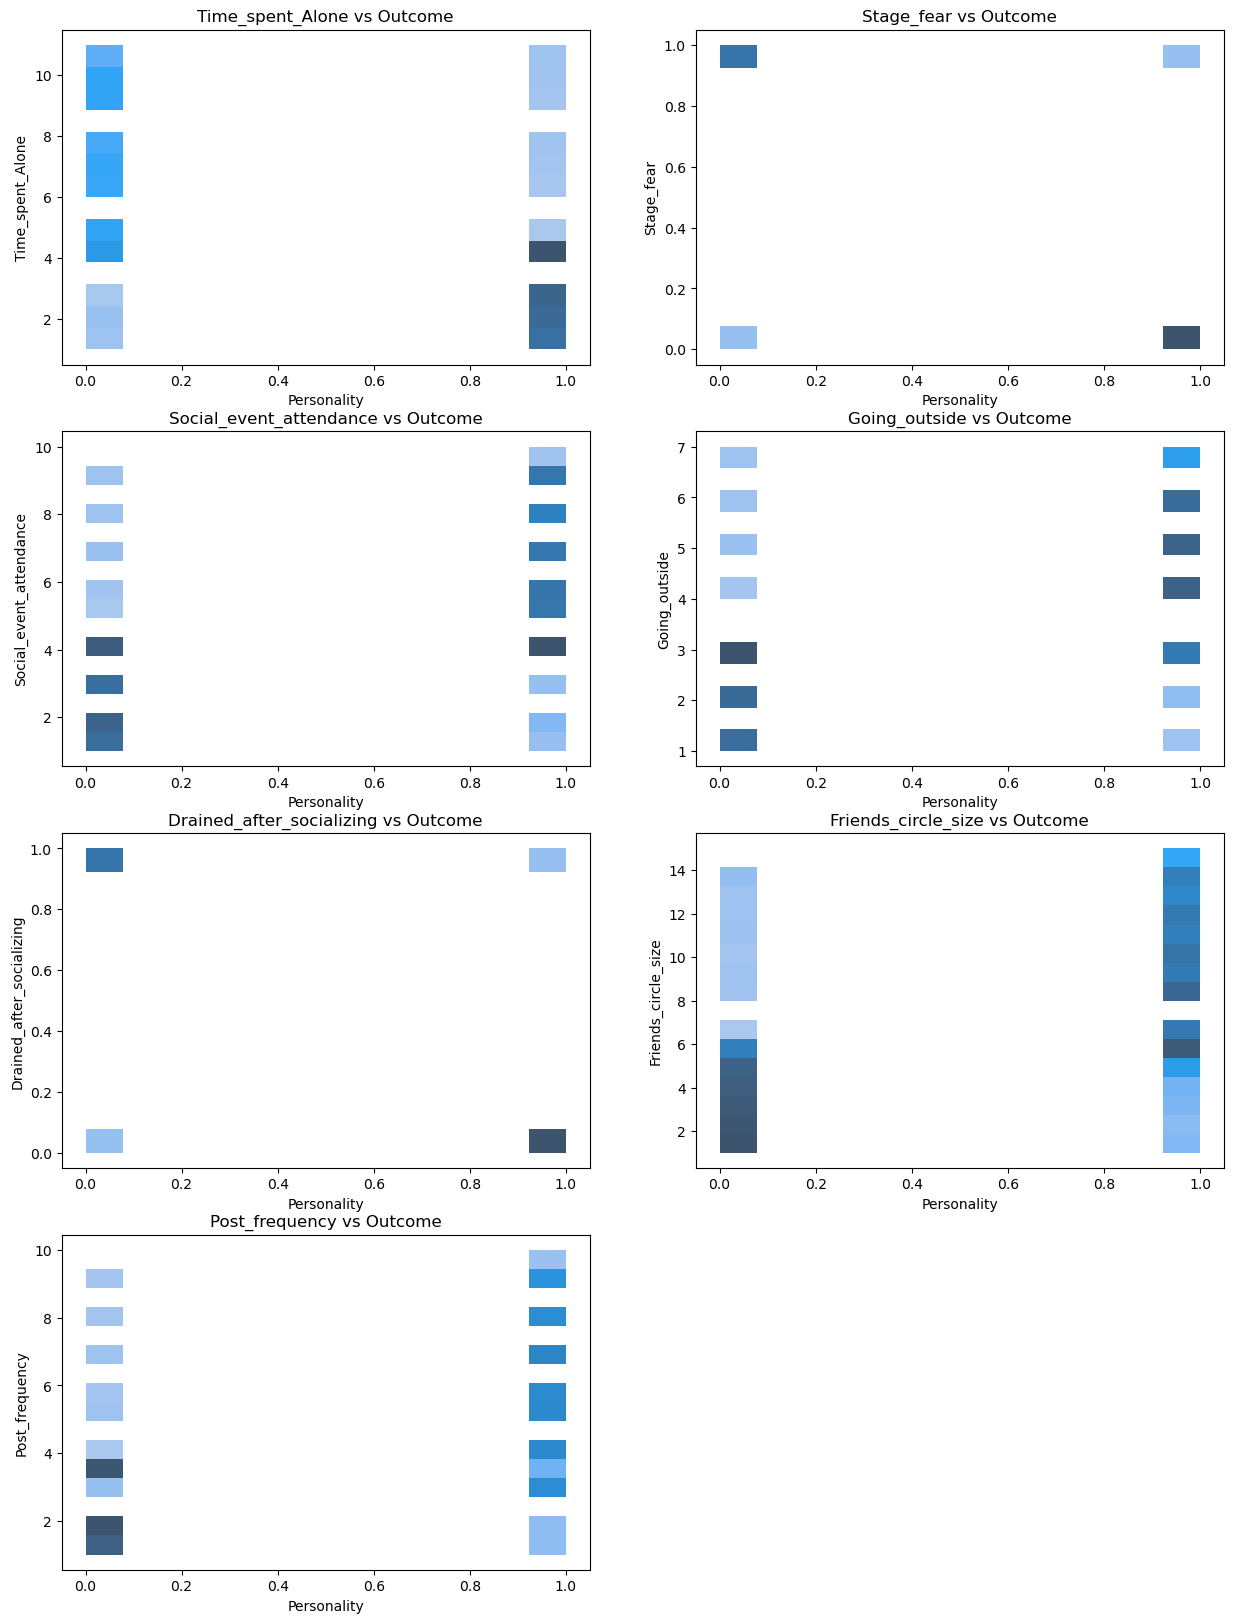

In [169]:
plt.figure(figsize=(15,20))
plotnumber = 1
for column in x.columns:
    if plotnumber <= 9:
        ax = plt.subplot(4,2 , plotnumber)
        sns.histplot(x=y, y=x[column], ax=ax)
        ax.set_title(f'{column} vs Outcome')
    plotnumber += 1
plt.show()

#### 3. Target Variable Encoding

In [172]:
data['Result']=data['Personality'].map({1: 'Extrovert', 0: 'Introvert'})
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Result
0,4.000000,0.0,4.000000,6.000000,0.0,13.000000,5.0,1,Extrovert
1,9.000000,1.0,3.878621,2.931724,1.0,6.102414,3.0,0,Introvert
2,9.000000,1.0,1.000000,2.000000,1.0,5.000000,2.0,0,Introvert
3,4.407931,0.0,6.000000,7.000000,0.0,14.000000,8.0,1,Extrovert
4,3.000000,0.0,9.000000,4.000000,0.0,8.000000,5.0,1,Extrovert


#### 4. Define Features and Target
##### Features variables: It is independant variable (x values)
##### Target variables: It is dependent variable (y values)

In [175]:
x_=data[['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside',
        'Drained_after_socializing','Friends_circle_size', 'Post_frequency']]
y_=data[['Personality']]

In [177]:
x_

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.000000,0.0,4.000000,6.000000,0.0,13.000000,5.000000
1,9.000000,1.0,3.878621,2.931724,1.0,6.102414,3.000000
2,9.000000,1.0,1.000000,2.000000,1.0,5.000000,2.000000
3,4.407931,0.0,6.000000,7.000000,0.0,14.000000,8.000000
4,3.000000,0.0,9.000000,4.000000,0.0,8.000000,5.000000
...,...,...,...,...,...,...,...
2894,4.407931,0.0,9.000000,3.000000,0.0,12.000000,3.484828
2896,3.000000,0.0,8.000000,3.000000,0.0,14.000000,9.000000
2897,4.000000,1.0,1.000000,1.000000,1.0,4.000000,3.484828
2898,11.000000,1.0,1.000000,2.931724,1.0,2.000000,3.484828


In [179]:
y_

,Personality
0,1
1,0
2,0
3,1
4,1
...,...
2894,1
2896,1
2897,0
2898,0


#### 5. Exploratory Data Analysis (EDA)

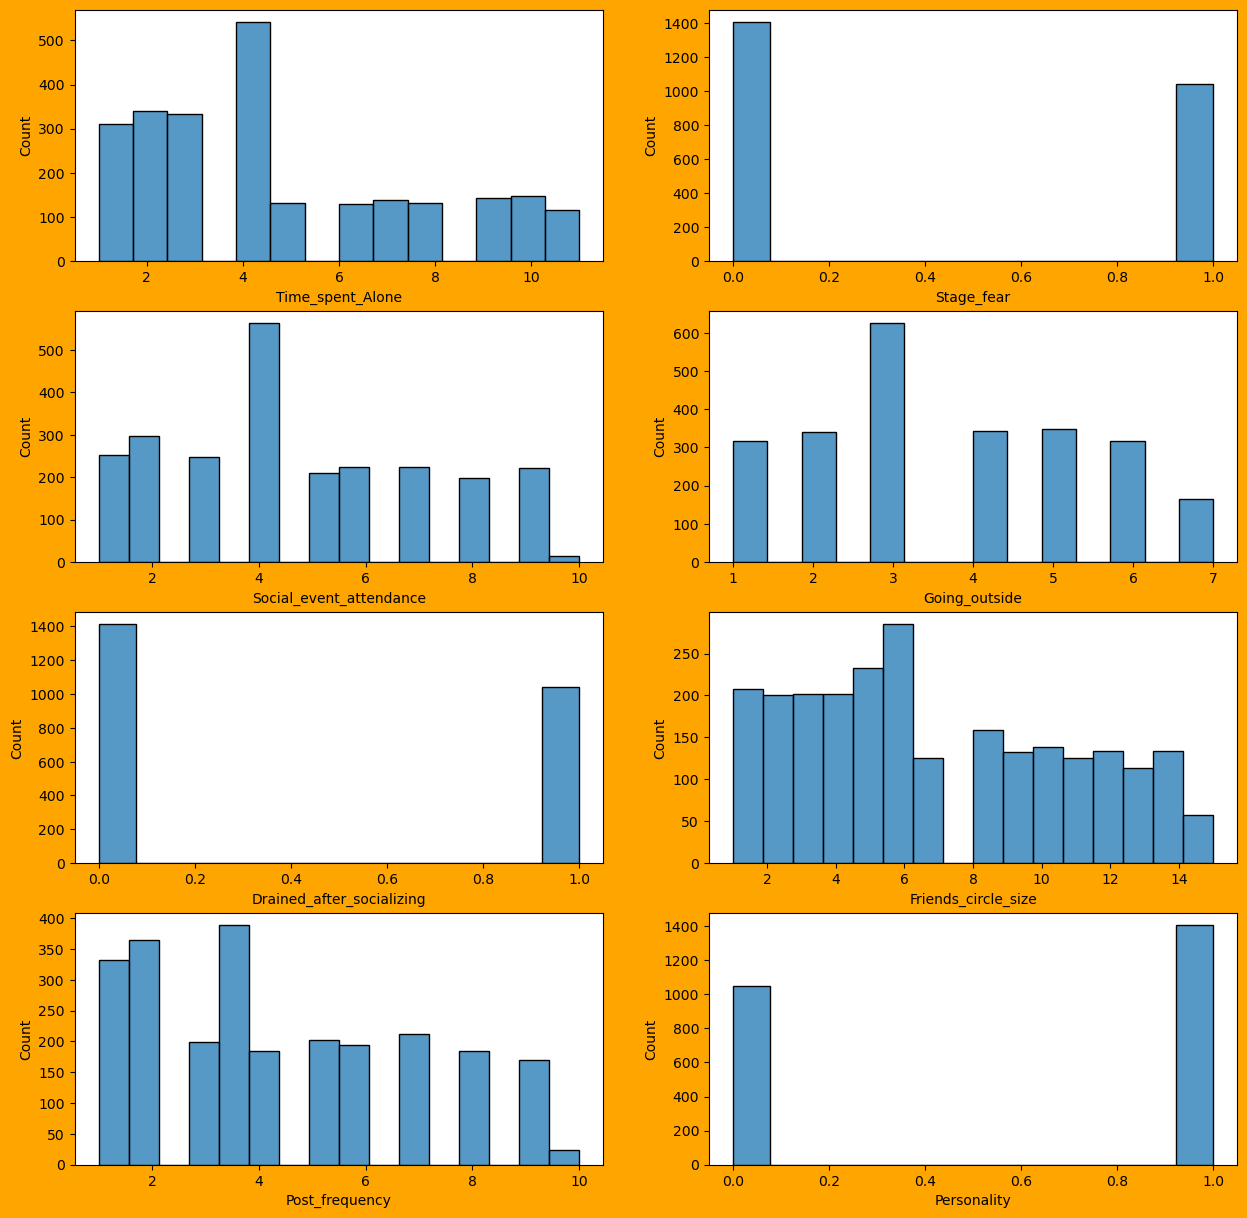

In [182]:
plt.figure(figsize=(15,15),facecolor='orange')
graph=1
for column in data:
    if graph <=8:
        ax=plt.subplot(4,2,graph)
        sns.histplot(data[column])
        plt.xlabel(column)
    graph +=1
plt.show()

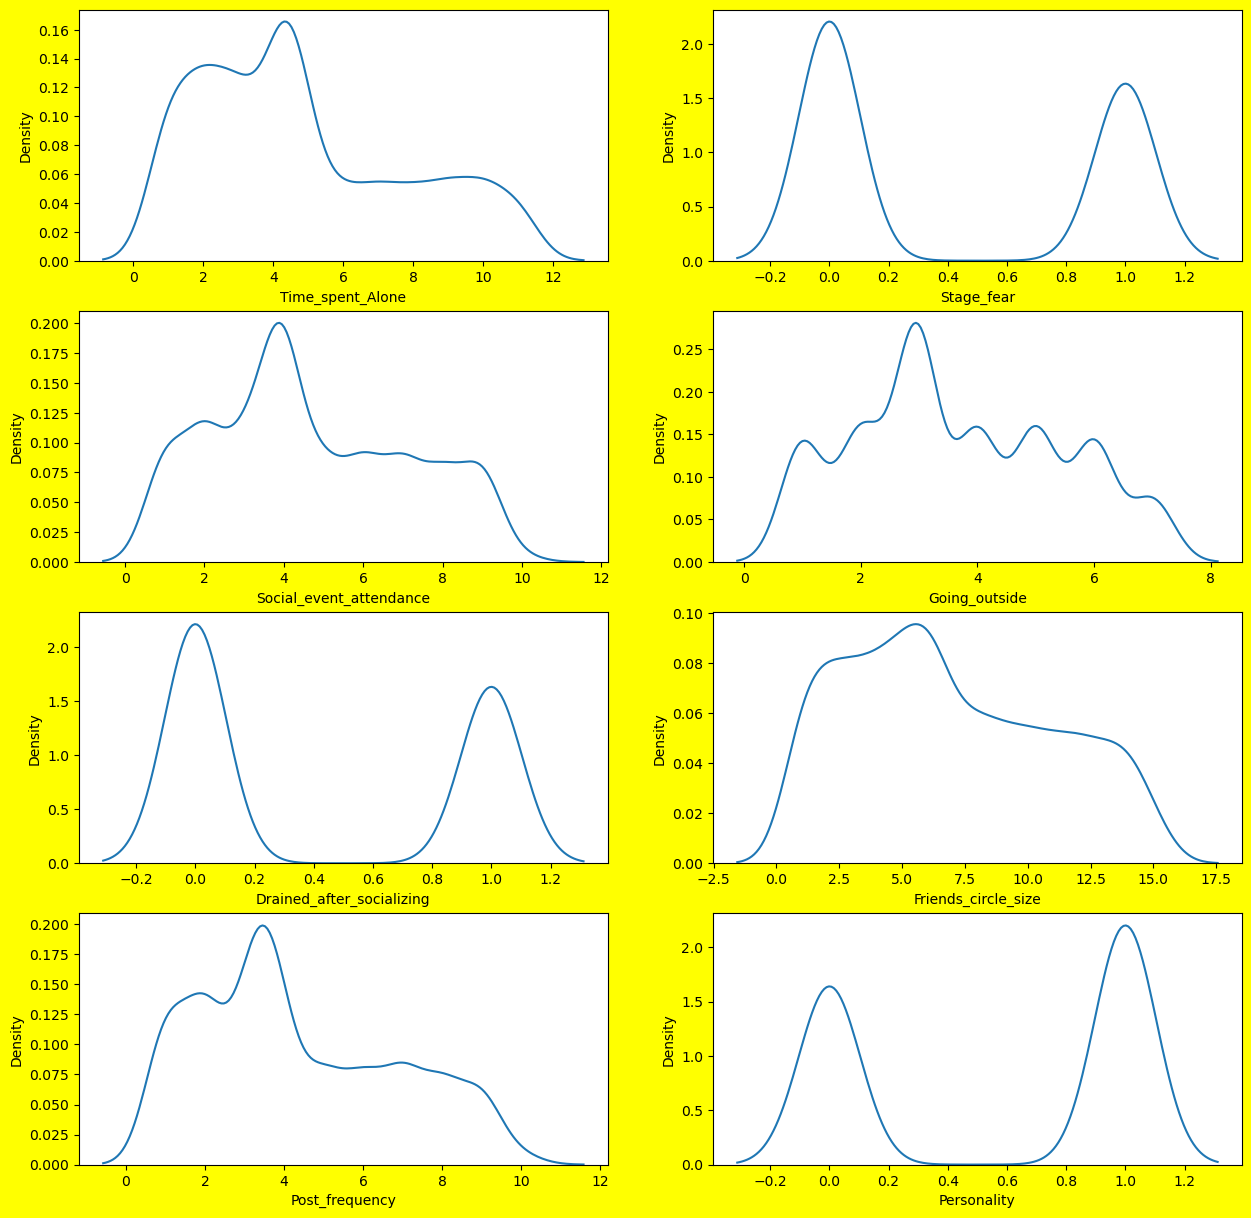

In [184]:
plt.figure(figsize=(15,15),facecolor='yellow')
graph=1
for column in data:
    if graph <=8:
        ax=plt.subplot(4,2,graph)
        sns.kdeplot(data[column])
        plt.xlabel(column)
    graph +=1
plt.show()

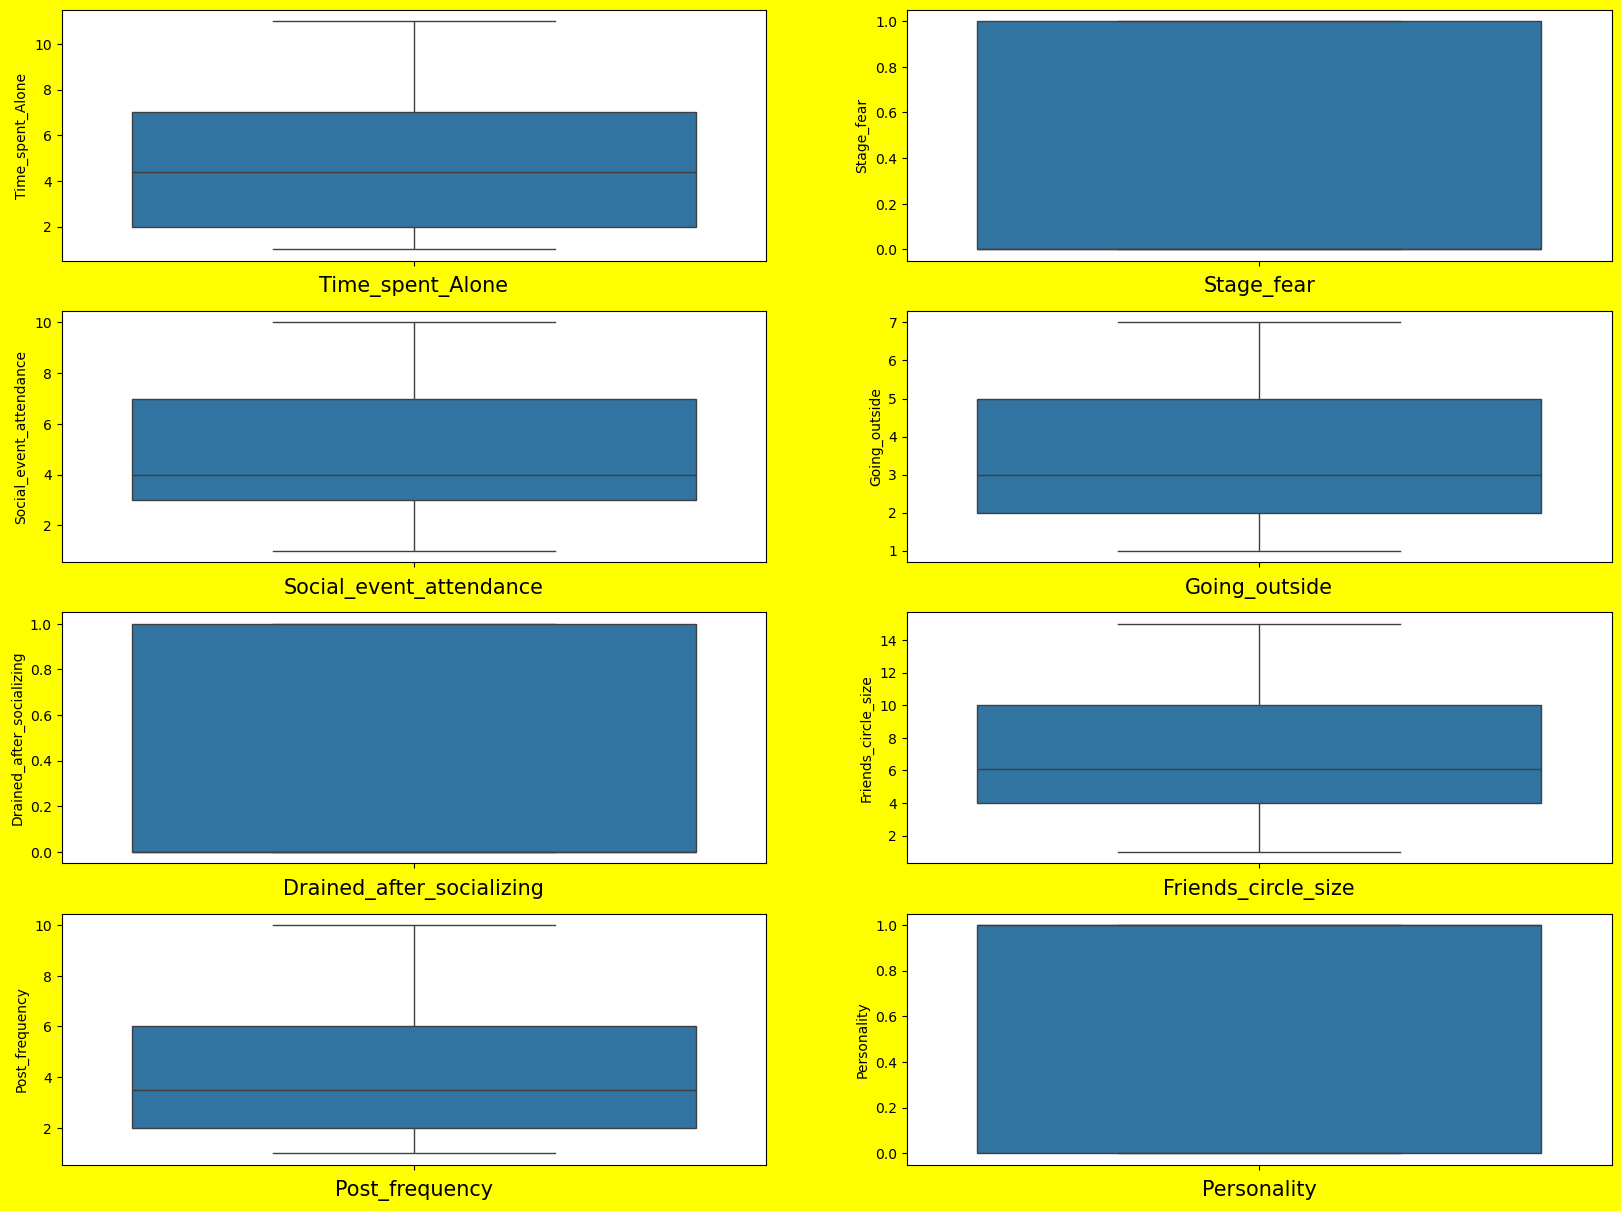

In [186]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber <=8:
        plt.subplot(4,2,plotnumber)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

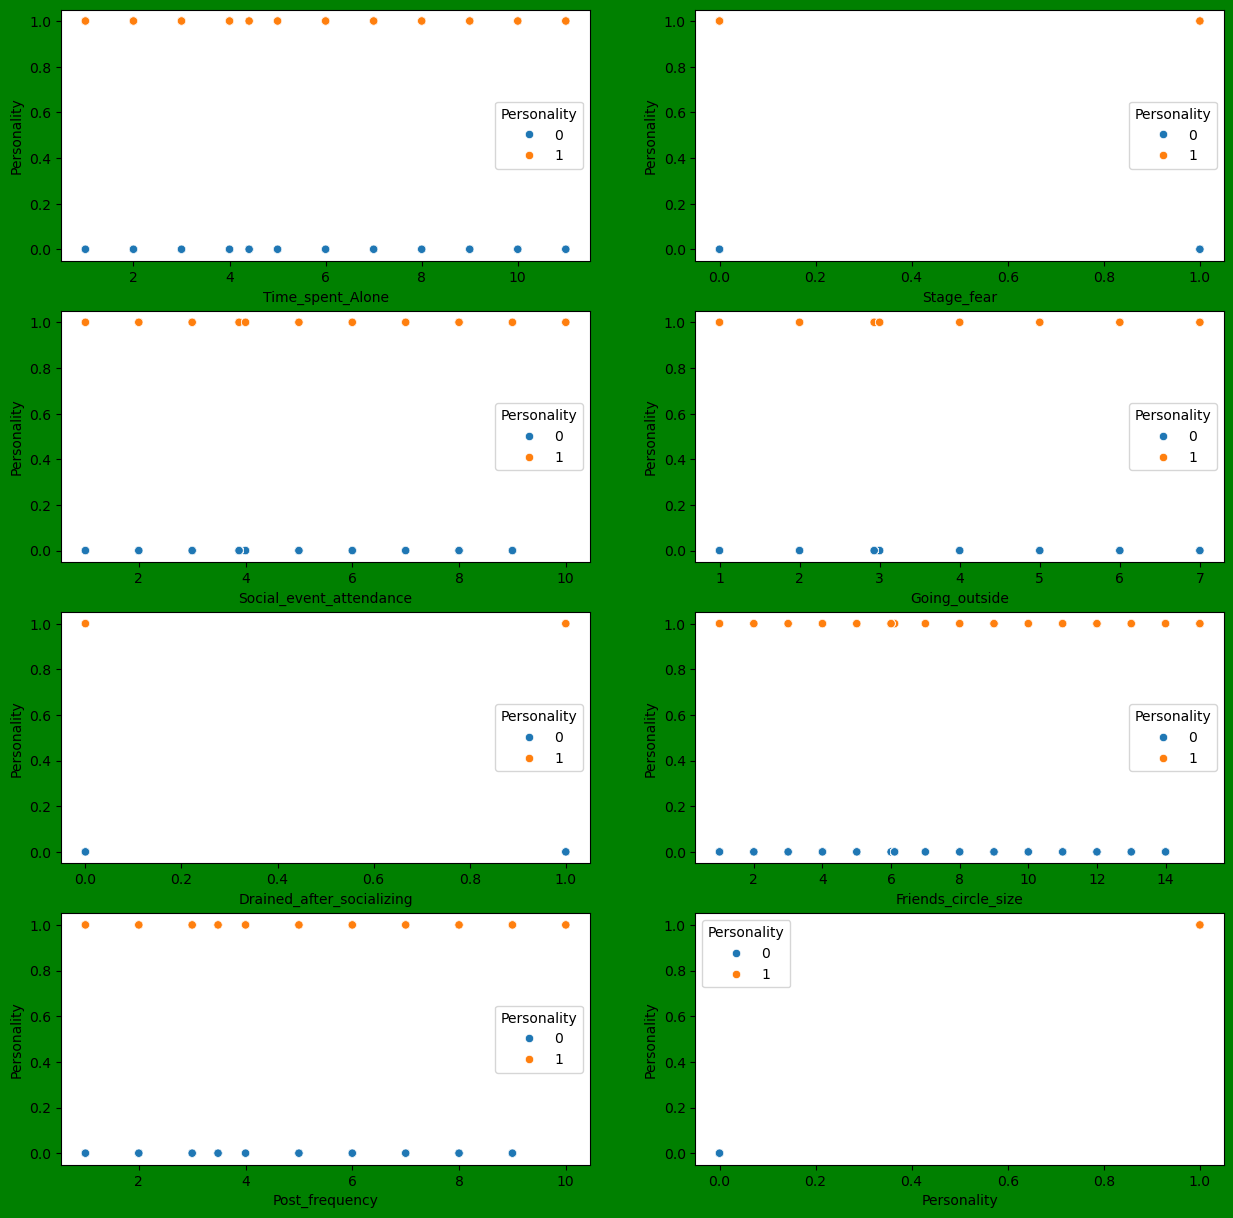

In [187]:
plt.figure(figsize=(15,15),facecolor='green')
plotnumber=1
for column in data:
    if plotnumber <=8:
        plt.subplot(4,2,plotnumber)
        sns.scatterplot(x= data[column], y='Personality', data=data, hue='Personality')
    plotnumber +=1
plt.show()

In [189]:
#Heatmap (Correlation Matrix):
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.000000,0.781543,-0.632888,-0.634087,0.779777,-0.631301,-0.605935,-0.647425
Stage_fear,0.781543,1.000000,-0.766712,-0.776526,0.948265,-0.771341,-0.733958,-0.821564
Social_event_attendance,-0.632888,-0.766712,1.000000,0.606973,-0.763809,0.640716,0.605712,0.646703
Going_outside,-0.634087,-0.776526,0.606973,1.000000,-0.778358,0.636370,0.625814,0.657809
Drained_after_socializing,0.779777,0.948265,-0.763809,-0.778358,1.000000,-0.766093,-0.732262,-0.819859
Friends_circle_size,-0.631301,-0.771341,0.640716,0.636370,-0.766093,1.000000,0.586715,0.635054
Post_frequency,-0.605935,-0.733958,0.605712,0.625814,-0.732262,0.586715,1.000000,0.622719
Personality,-0.647425,-0.821564,0.646703,0.657809,-0.819859,0.635054,0.622719,1.000000


In [192]:
x=data.drop(columns=['Personality'])
y=data.Personality

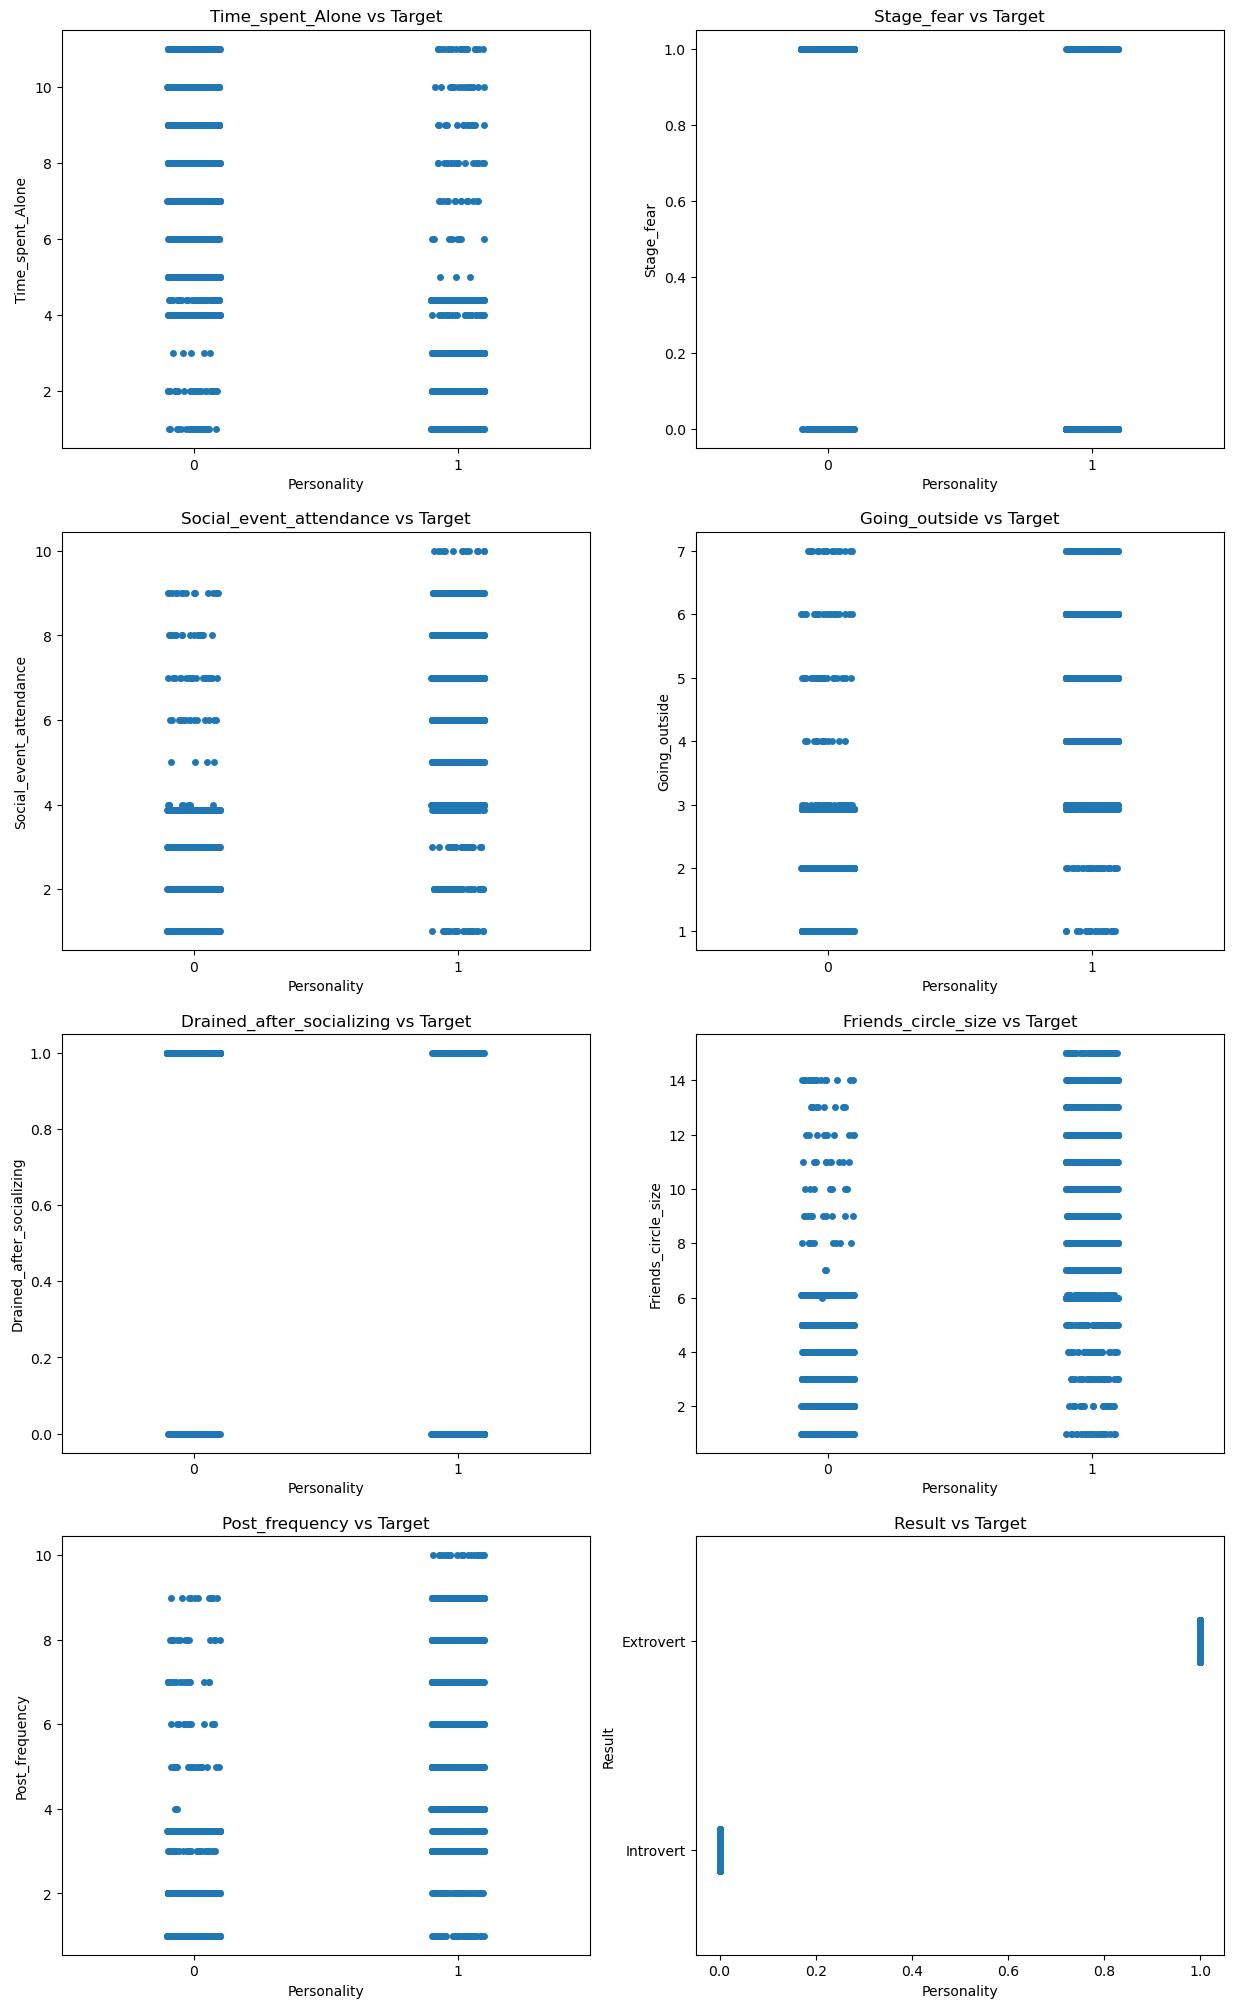

In [194]:
#Feature vs. Target Relationship
plt.figure(figsize=(15,25))
plotnumber = 1
for column in x.columns:
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.stripplot(x=y, y=x[column], ax=ax)
        ax.set_title(f'{column} vs Target')
    plotnumber += 1
plt.show()

#### 6. Feature Scaling

In [197]:
x=data.drop(columns=['Personality', 'Result'])
y=data.Personality

In [199]:
x

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.000000,0.0,4.000000,6.000000,0.0,13.000000,5.000000
1,9.000000,1.0,3.878621,2.931724,1.0,6.102414,3.000000
2,9.000000,1.0,1.000000,2.000000,1.0,5.000000,2.000000
3,4.407931,0.0,6.000000,7.000000,0.0,14.000000,8.000000
4,3.000000,0.0,9.000000,4.000000,0.0,8.000000,5.000000
...,...,...,...,...,...,...,...
2894,4.407931,0.0,9.000000,3.000000,0.0,12.000000,3.484828
2896,3.000000,0.0,8.000000,3.000000,0.0,14.000000,9.000000
2897,4.000000,1.0,1.000000,1.000000,1.0,4.000000,3.484828
2898,11.000000,1.0,1.000000,2.931724,1.0,2.000000,3.484828


In [201]:
y

0       1
1       0
2       0
3       1
4       1
       ..
2894    1
2896    1
2897    0
2898    0
2899    1
Name: Personality, Length: 2452, dtype: int64

In [203]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [205]:
#Perform VIF calculation after scaling the features
vif=pd.DataFrame()

In [207]:
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,2.687489,Time_spent_Alone
1,11.713613,Stage_fear
2,2.548006,Social_event_attendance
3,2.672786,Going_outside
4,11.412265,Drained_after_socializing
5,2.578193,Friends_circle_size
6,2.267999,Post_frequency


#### 7. Multicollinearity Check

#### 8. Train-Test Split

In [213]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=355)

#### 9. Model Building

In [218]:
logistic_reg=LogisticRegression()
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [221]:
y_pred=logistic_reg.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,

#### 10. Model Evaluation

In [224]:
#Accuracy of the Model 
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9144602851323829

#### Our Model has 91.44% accuracy

In [241]:
#Confusion MAtrix of the model
confusion_matrix(y_test,y_pred)

array([[173,  24],
       [ 18, 276]], dtype=int64)

In [243]:
#Training and Testng Score
logistic_reg.score(x_train,y_train)

0.9077001529831719

In [245]:
logistic_reg.score(x_test,y_test)

0.9144602851323829

## Problem 2: Customer Retail Purchase Analysis & Prediction (2023)
#### Problem Statement
##### Using the Customer Retail Purchase Data (2023), we aim to build a Linear Regression model that predicts the Total Amount Spent by a customer during a transaction. The model will use customer demographics and purchase behavior to make predictions.

In [5]:
#import necessory libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

#### Step 1: Data Cleaning & Preprocessing

In [7]:
#Check for null/missing values
df=pd.read_csv(r"C:\Users\HP\Documents\AI_projects\Test 8.0\Test 8.0\Regression Problem\sales.csv")
df.tail()

,Unnamed: 0.1,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,995,995,2023-05-16,0,62,1,1,50,50
996,996,996,2023-11-17,0,52,0,3,30,90
997,997,997,2023-10-29,1,23,0,4,25,100
998,998,998,2023-12-05,1,36,2,3,50,150
999,999,999,2023-04-12,0,47,2,4,30,120


In [10]:
df.shape

(1000, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      1000 non-null   int64 
 1   Unnamed: 0        1000 non-null   int64 
 2   Date              1000 non-null   object
 3   Gender            1000 non-null   int64 
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   int64 
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [14]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,499.500000,0.51000,41.39200,1.035000,2.514000,179.890000,456.000000
std,288.819436,288.819436,0.50015,13.68143,0.805247,1.132734,189.681356,559.997632
min,0.000000,0.000000,0.00000,18.00000,0.000000,1.000000,25.000000,25.000000
25%,249.750000,249.750000,0.00000,29.00000,0.000000,1.000000,30.000000,60.000000
50%,499.500000,499.500000,1.00000,42.00000,1.000000,3.000000,50.000000,135.000000
75%,749.250000,749.250000,1.00000,53.00000,2.000000,4.000000,300.000000,900.000000
max,999.000000,999.000000,1.00000,64.00000,2.000000,4.000000,500.000000,2000.000000


In [16]:
df.isna().sum()

Unnamed: 0.1        0
Unnamed: 0          0
Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [18]:
## There is no null values

In [20]:
#Check for duplicate entries
df = df.drop_duplicates()
df.shape

(1000, 9)

In [22]:
## There is no duplicate entities values

In [24]:
# Detect and handle outliers
del df['Unnamed: 0.1']
del df['Unnamed: 0']
del df['Date']
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,34,0,3,50,150
1,1,26,1,2,500,1000
2,0,50,2,1,30,30
3,0,37,1,1,500,500
4,0,30,0,2,50,100


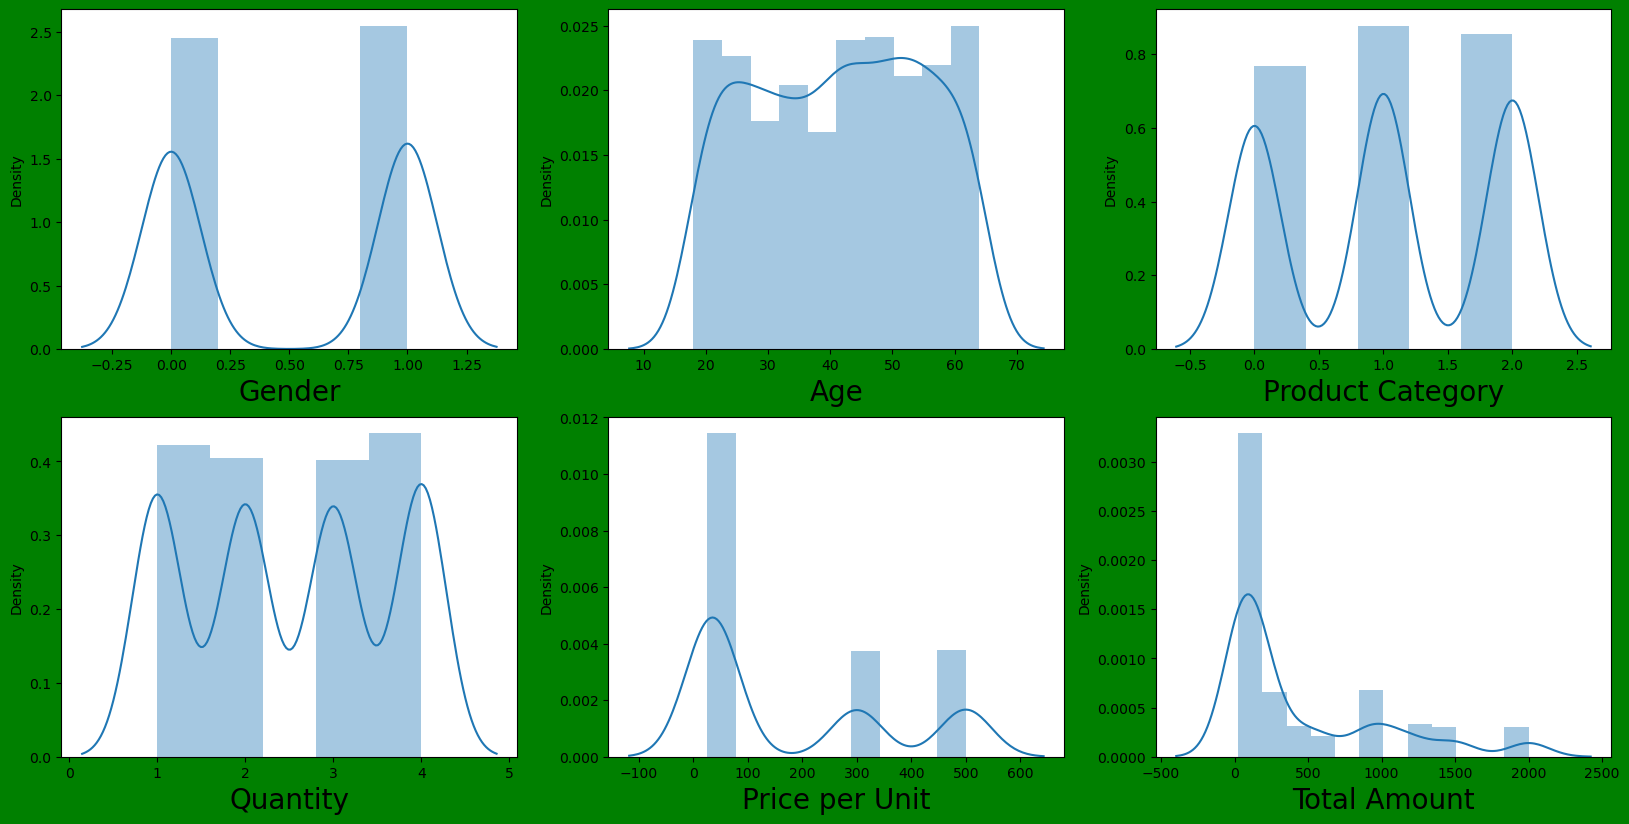

In [26]:
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [30]:
#replacing zero values with the mean of the column 

df['Product Category']=df['Product Category'].replace(0,df['Product Category'].mode()[0])

In [32]:
y=df['Total Amount']
x=df.drop(columns=['Total Amount'])

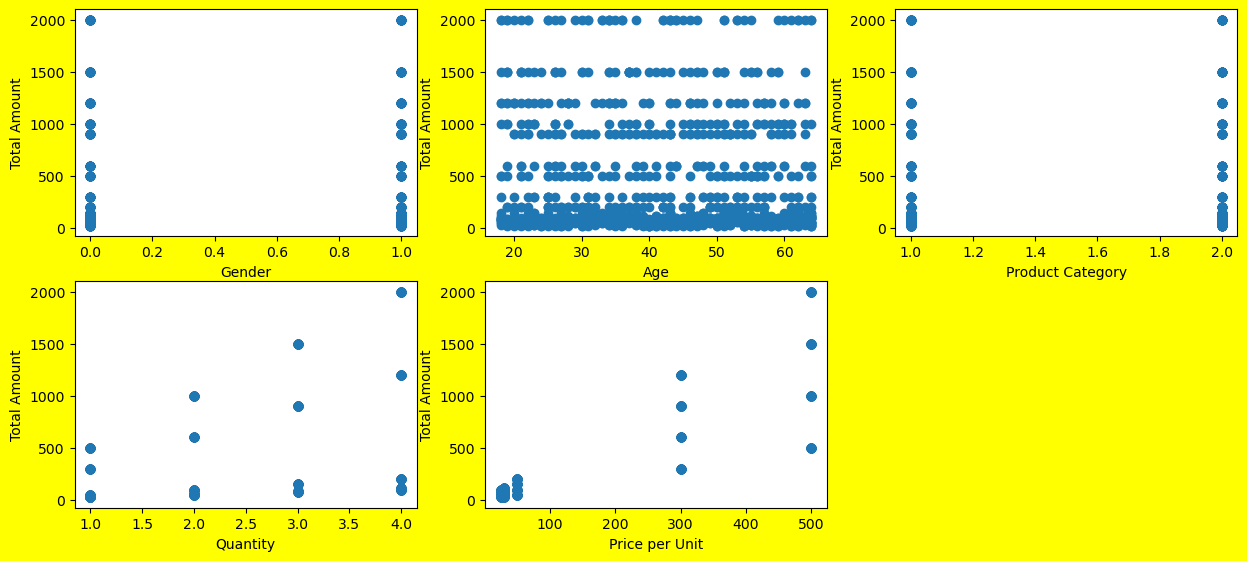

In [34]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber <=6:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Total Amount',fontsize=10)
    plotnumber +=1
plt.show()


In [35]:
#Detect and handle outliers
df_feature=df.drop(['Total Amount', 'Gender'], axis=1)

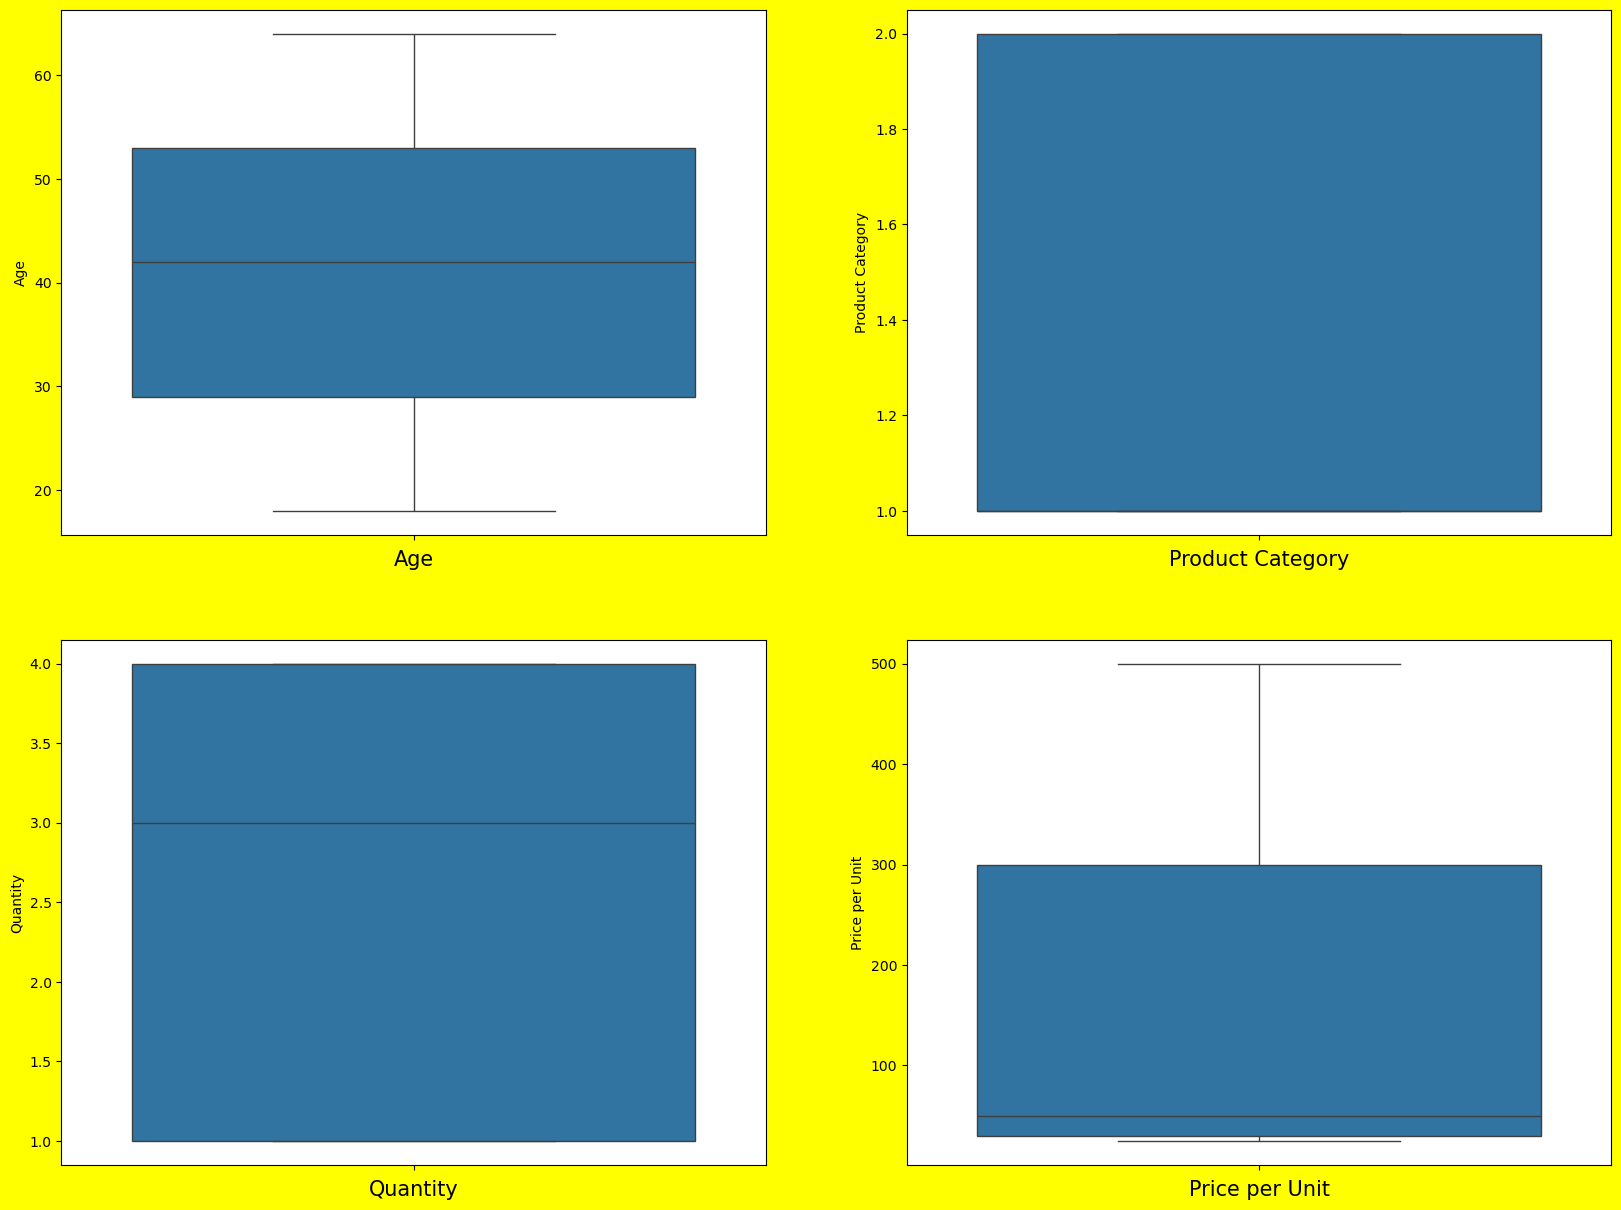

In [38]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in df_feature:
    if plotnumber <=4:
        plt.subplot(2,2 ,plotnumber)
        ax=sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

#### There is no outliers

### Step 2: Exploratory Data Analysis (EDA)
#### Distribution Plots
#### Age distribution
#### Price per Unit distribution
#### Quantity and Total Amount distribution

In [42]:
df_feature=df.drop(['Product Category', 'Gender',], axis=1)

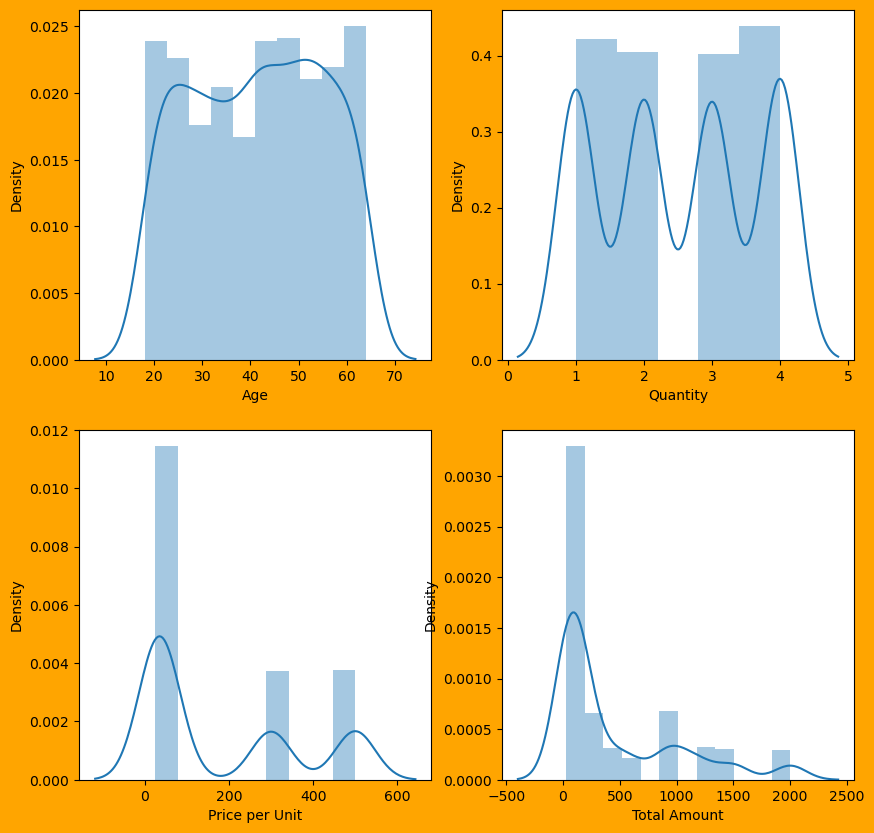

In [44]:
plt.figure(figsize=(10,10),facecolor='orange')
graph=1
for column in df_feature:
    if graph <=4:
        ax=plt.subplot(2,2,graph)
        sns.distplot(df_feature[column])
        plt.xlabel(column)
    graph +=1
plt.show()

### Gender-wise Analysis
#### Total Amount by Gender
#### Average Quantity purchased by Gender

In [47]:
x=df.drop(columns=['Product Category', 'Age', 'Price per Unit', 'Gender'])
y=df['Gender']

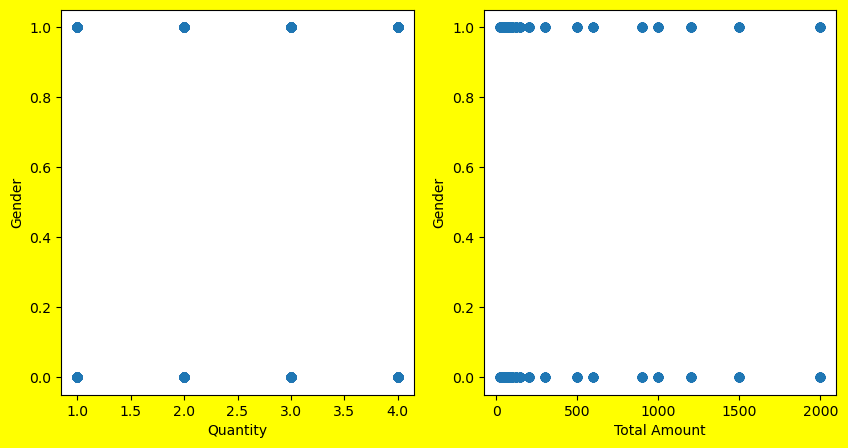

In [49]:
plt.figure(figsize=(10,5),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber <=4:
        ax=plt.subplot(1,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Gender',fontsize=10)
    plotnumber +=1
plt.show()

### Category Trends
#### Most popular Product Categories
#### Monthly or seasonal trends (extract from Date)

In [53]:
x=df.drop(columns=['Product Category'])
y=df['Product Category']

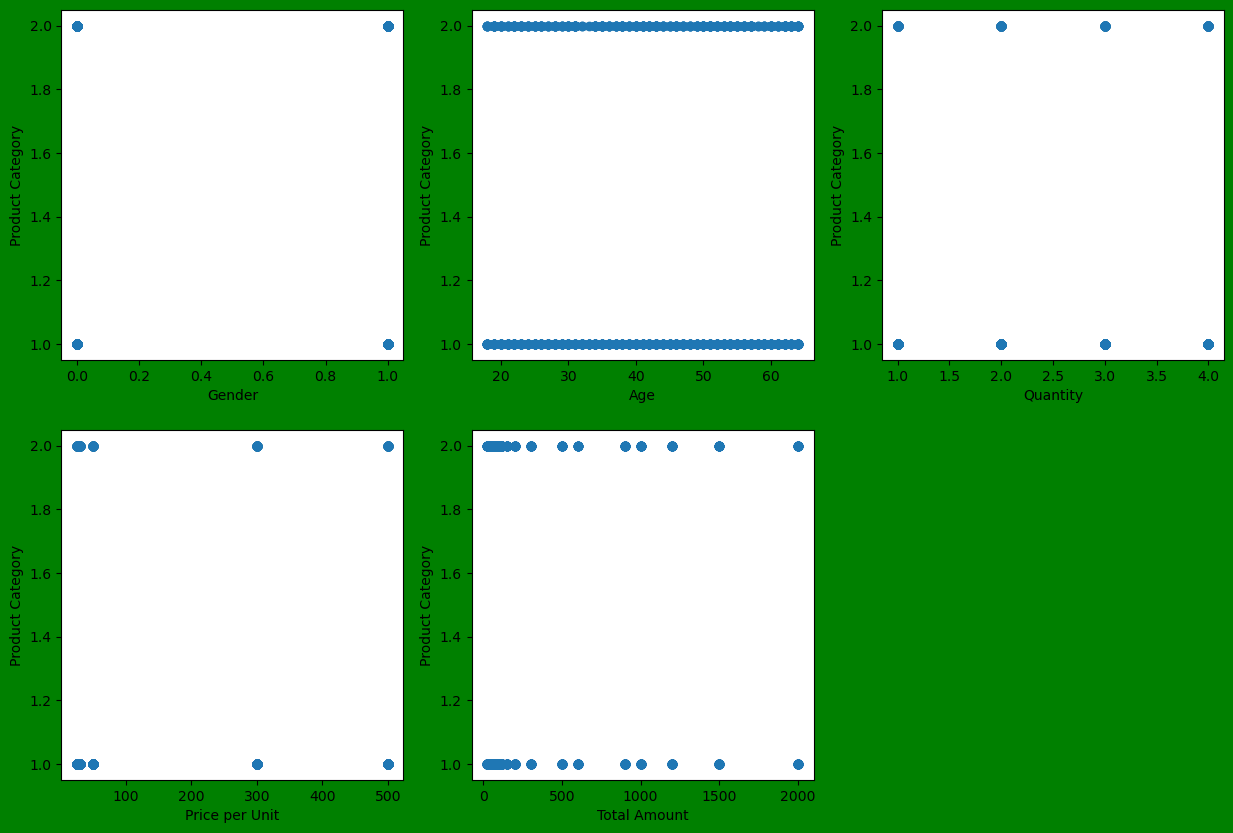

In [55]:
plt.figure(figsize=(15,10),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber <=8:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Product Category',fontsize=10)
    plotnumber +=1
plt.show()

In [57]:
df_1=pd.read_csv(r"C:\Users\HP\Documents\AI_projects\Test 8.0\Test 8.0\Regression Problem\sales.csv")

In [59]:
del df_1['Unnamed: 0.1']
del df_1['Unnamed: 0']
df_1['Product Category']=df_1['Product Category'].replace(0,df['Product Category'].mode()[0])

In [61]:
df_1.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,0,34,1,3,50,150
1,2023-02-27,1,26,1,2,500,1000
2,2023-01-13,0,50,2,1,30,30
3,2023-05-21,0,37,1,1,500,500
4,2023-05-06,0,30,1,2,50,100


In [63]:
df_1['Date']=pd.to_datetime(df_1['Date'])

In [65]:
df_1['Month']=df_1['Date'].dt.strftime('%B')
df_1['Month_num']=df_1['Date'].dt.month

In [67]:
df_1.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Month_num
0,2023-11-24,0,34,1,3,50,150,November,11
1,2023-02-27,1,26,1,2,500,1000,February,2
2,2023-01-13,0,50,2,1,30,30,January,1
3,2023-05-21,0,37,1,1,500,500,May,5
4,2023-05-06,0,30,1,2,50,100,May,5


In [69]:
x=df_1.drop(columns=['Date', 'Month', 'Month_num'])
y=df_1['Month_num']

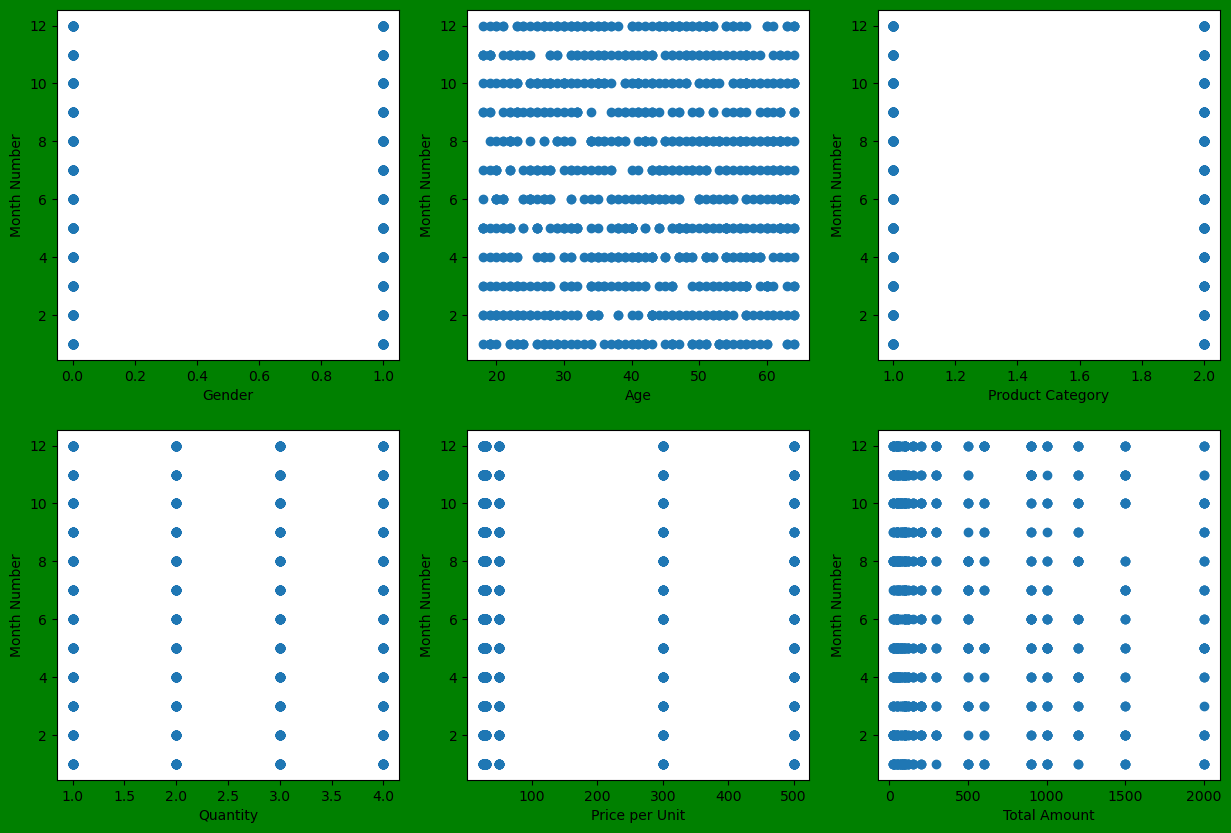

In [71]:
plt.figure(figsize=(15,10),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber <=8:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Month Number',fontsize=10)
    plotnumber +=1
plt.show()

## Step 3: Feature Scaling
### Apply StandardScaler to scale numerical features:
#### Age
#### Quantity
#### Price per Unit

In [131]:
y=df['Total Amount']
x=df.drop(columns=['Gender', 'Product Category', 'Total Amount'])

In [133]:
x

,Age,Quantity,Price per Unit
0,34,3,50
1,26,2,500
2,50,1,30
3,37,1,500
4,30,2,50
...,...,...,...
995,62,1,50
996,52,3,30
997,23,4,25
998,36,3,50


In [135]:
y

0       150
1      1000
2        30
3       500
4       100
       ... 
995      50
996      90
997     100
998     150
999     120
Name: Total Amount, Length: 1000, dtype: int64

In [137]:
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.54056476,  0.42926498, -0.68512265],
       [-1.12559156, -0.45399629,  1.68846418],
       [ 0.62948884, -1.33725757, -0.7906154 ],
       ...,
       [-1.34497661,  1.31252625, -0.81698859],
       [-0.39430806,  0.42926498, -0.68512265],
       [ 0.41010379,  1.31252625, -0.7906154 ]])

#### Step 4: Train-Test Split

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=42)
y_train.head()

29     900
535    120
695    200
557     25
836     90
Name: Total Amount, dtype: int64

#### Step 5: Linear Regression Model

In [144]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [146]:
#Predict on test set
y_pred =(regression.predict(x_test))
y_pred

array([ 1.33995911e+03,  4.60817052e+01,  4.81772051e+02,  3.40327460e+02,
        1.54393118e+03,  1.96710650e+02, -1.47943935e+02,  5.08898673e+02,
        3.85305066e+02,  1.16040100e+03,  1.83374870e+02,  4.06563809e+01,
        6.65851263e+02, -1.88627967e+02,  4.83580493e+02,  1.44398798e+01,
        1.53488897e+03,  9.91877619e+00, -7.04342344e-01,  1.03853079e+03,
        8.48122034e+02,  3.52082329e+02,  1.35985196e+03,  8.76568911e-01,
        1.34357599e+03, -2.07389073e+02, -2.15014191e+01,  8.57164241e+02,
        3.96155715e+02,  1.79757987e+02, -1.96538424e+02, -1.80489981e+02,
        1.56248248e+02,  3.25859928e+02, -1.76645568e+02,  1.34086333e+03,
        3.29476811e+02, -1.80262451e+02, -1.45231273e+02,  2.35586242e+02,
        3.38519018e+02,  1.15587990e+03,  1.33182112e+03,  3.91634611e+02,
        4.25090778e+02,  3.46657005e+02,  5.02569128e+02,  5.07090232e+02,
        6.46862628e+02,  6.62234380e+02, -1.33476403e+02,  1.18210230e+03,
        3.63609668e+02, -

#### Step 6: Model Evaluation

In [149]:
#R² Score
regression.score(x_train,y_train)

0.8543380040148312

In [151]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=regression.predict(x_test)

In [153]:
#Mean Absolute Error (MAE)
mean_absolute_error(y_test,y_pred)

173.1161021544195

In [155]:
#Mean Squared Error (MSE)
mean_squared_error(y_test,y_pred)

41896.213221343605

In [157]:
#Root Mean Squared Error (RMSE)
np.sqrt(mean_squared_error(y_test,y_pred))

204.68564488342508

### Step 7: Regularization for Overfitting Check
#### Lasso Regression

In [160]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

In [162]:
alpha=lasscv.alpha_
alpha

0.48072501289782765

In [164]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.48072501289782765)

In [166]:
lasso_reg.score(x_test,y_test)

0.8569207440975642

In [168]:
# Ridge

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [170]:
ridgecv.alpha_

0.09099999999999998

In [172]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [174]:
ridge_model.score(x_test,y_test)

0.8568765765391246

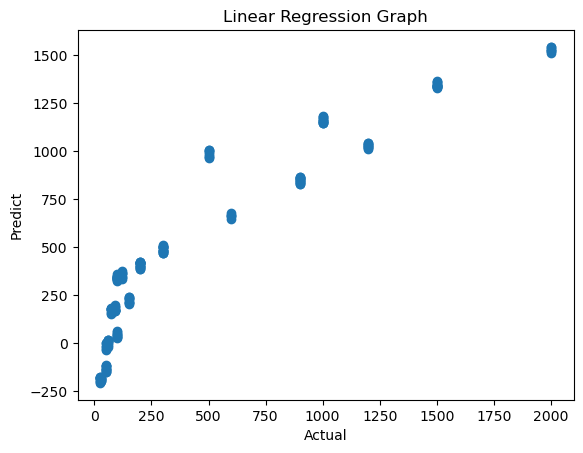

In [176]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title('Linear Regression Graph')
plt.show()